# Week 12 Discussion Post


In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Expected net gain from 5000 sessions: 444.107768


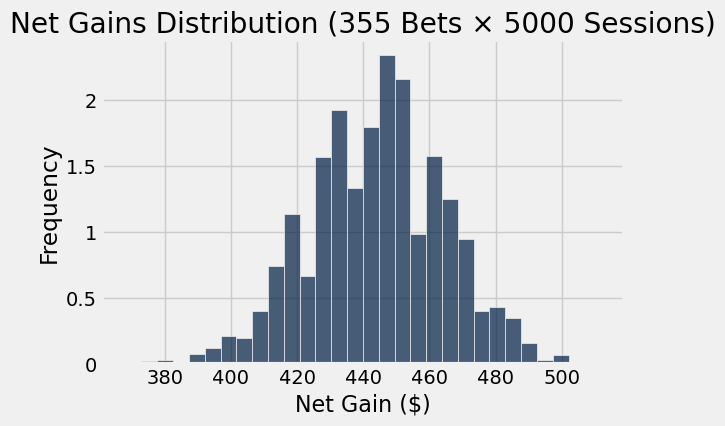

In [15]:
wheel = Table.read_table('roulette.csv')

def spin_once():
    spin = wheel.sample(1)
    color = spin.column('Color')[0]
    pocket = spin.column('Pocket')[0]
    
    if color == 'red' or (pocket % 2 == 0 and pocket > 10):
        return 1.76  # William's assigned payout
    return -1

def simulate_session(n_bets=355):
    return sum([spin_once() for _ in range(n_bets)])

def run_trials(n_sessions=5000, n_bets=355):
    return make_array(*[simulate_session(n_bets) for _ in range(n_sessions)])

results = run_trials()

Table().with_column('Net Gain', results).hist(bins=30)
plots.title('Net Gains Distribution (355 Bets × 5000 Sessions)')
plots.xlabel('Net Gain ($)')
plots.ylabel('Frequency')

print('Expected net gain from 5000 sessions:', np.mean(results))

In [4]:
wheel = Table.read_table('roulette.csv')



In [5]:
def winnings(table):
    win = make_array()
    pc = table.column('Pocket')
    cl = table.column('Color')
    for i in np.arange(table.num_rows):
        if (cl[i] == 'red' ):
            win = np.append(win, 1.28)           
        elif cl[i] == 'black' and pc[i] > 10:
            win = np.append(win, 1.28)
        else:
            win = np.append(win, -1)
            
    winred = table.with_column('Winnings', win)
    return winred

In [6]:
red = winnings(wheel)

In [7]:
red.show()


Pocket,Color,Winnings
0,green,-1
0,green,-1
1,red,1.28
2,black,-1
3,red,1.28
4,black,-1
5,red,1.28
6,black,-1
7,red,1.28
8,black,-1


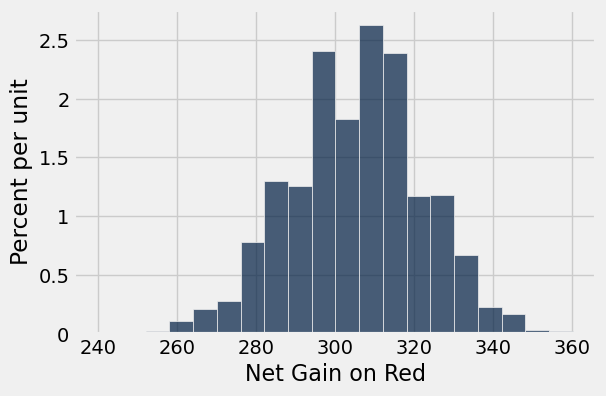

In [9]:
num_bets = 355
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

x = results.column('Net Gain on Red').min()
y = results.column('Net Gain on Red').max()
results.hist(bins=np.arange(x, y + .1, 6))

In [10]:
results

Net Gain on Red
299.36
281.12
310.76
294.8
308.48
285.68
306.2
315.32
285.68
310.76
